In [1]:
%matplotlib inline

In [2]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted
sns.set()

from pathlib import Path
from typing import Union

In [3]:
CSV_FILES_DIR = Path("CSV_files/")
NPZ_FILES_DIR = Path("NPZ_files/")
PLOTS_SAVE_DIR = Path("Plots/")
HAM10k_DATA_DIR = Path("/local-scratch2/Datasets/ISBI_ISIC/2018/Task3/ISIC2018_Task3_Training_Input/")

# Frequency counts of lesion IDs

In [4]:
original_metadata = pd.read_csv(CSV_FILES_DIR / "combined_metadata_original.csv", header="infer")
original_metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,split
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,train
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,test
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,train
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,train
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,train


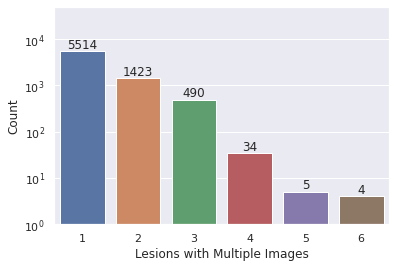

In [5]:
sns.set(font_scale=1)

combined_stats_toplot = original_metadata['lesion_id'].value_counts().value_counts().sort_index()

ax = sns.barplot(x=combined_stats_toplot.index, y=combined_stats_toplot.values)

ax.bar_label(ax.containers[0])

ax.set(ylim=(1, 5e4))
ax.set_yscale("log")
ax.set_xlabel("Lesions with Multiple Images")
ax.set_ylabel("Count")

plt.savefig(PLOTS_SAVE_DIR / "lesionID_frequency.png", dpi=300, bbox_inches="tight")
plt.savefig(PLOTS_SAVE_DIR / "lesionID_frequency.pdf", dpi=300, bbox_inches="tight")

# Venn diagram of lesion ID overlap

In [6]:
original_metadata = pd.read_csv(CSV_FILES_DIR / "combined_metadata_original.csv", header="infer")

In [7]:
original_metadata.shape

(10015, 9)

In [8]:
# Creating a Venn diagram from 3 lists

list_U = original_metadata["lesion_id"].tolist()
list_train = original_metadata[original_metadata["split"] == "train"]["lesion_id"].tolist()    #1
list_val = original_metadata[original_metadata["split"] == "val"]["lesion_id"].tolist()    #2
list_test = original_metadata[original_metadata["split"] == "test"]["lesion_id"].tolist()    #3

int_1_2 = set(list_train) & set(list_val)
int_2_3 = set(list_val) & set(list_test)
int_3_1 = set(list_test) & set(list_train)
int_1_2_3 = set(list_train) & set(list_val) & set(list_test)

only_1 = set(list_train) - (set(list_val) | set(list_test))
only_2 = set(list_val) - (set(list_test) | set(list_train))
only_3 = set(list_test) - (set(list_train) | set(list_val))

count_int_1_2 = len(int_1_2)
count_int_2_3 = len(int_2_3)
count_int_3_1 = len(int_3_1)
count_int_1_2_3 = len(int_1_2_3)

count_only_1 = len(only_1)
count_only_2 = len(only_2)
count_only_3 = len(only_3)

In [9]:
print(count_int_1_2)
print(count_int_2_3)
print(count_int_3_1)
print(count_int_1_2_3)
print(count_only_1)
print(count_only_2)
print(count_only_3)

332
113
641
40
4745
565
1154


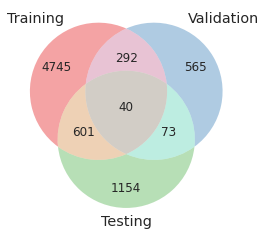

In [10]:
sns.set(font_scale=1)
venn = venn3_unweighted(
    [set(list_train), set(list_val), set(list_test)], 
    set_labels=("Training", "Validation", "Testing"),
    set_colors=("#e41a1c", "#377eb8", "#4daf4a")
)

# venn3_circles(
#     [set(list_train), set(list_val), set(list_test)], 
# #     set_labels=("train", "val", "test"),
#     linewidth=1, color="grey"
# )

plt.savefig(PLOTS_SAVE_DIR / "lesionID_venn.png", dpi=300, bbox_inches="tight")
plt.savefig(PLOTS_SAVE_DIR / "lesionID_venn.pdf", dpi=300, bbox_inches="tight")

# Partitions statistics

In [18]:
sns.set(font_scale=3.5)
# sns.set(font_scale=1.5, rc={'figure.figsize':(4,8)})

In [5]:
original_metadata = pd.read_csv(CSV_FILES_DIR / "combined_metadata_original.csv", header="infer")
corrected_metadata = pd.read_csv(CSV_FILES_DIR / "combined_metadata_corrected-HAM10000_corrected.csv", header="infer")
extended_metadata = pd.read_csv(CSV_FILES_DIR / "combined_extended.csv", header="infer")

In [6]:
hue_order = ["train", "val", "test"]
dx_order = ["akiec", "bcc", "bkl", "df", "mel", "nv", "vasc"]

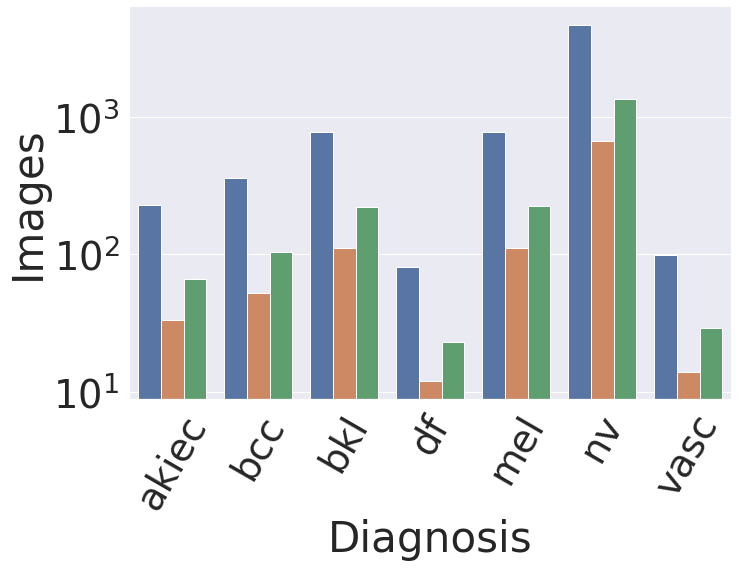

In [31]:
original_plot = sns.catplot(
    data=original_metadata, kind="count", x="dx", 
    hue="split", order=dx_order, hue_order=hue_order,
    height=8, aspect=12/8
)
plt.yscale("log")
plt.xlabel("Diagnosis")
plt.ylabel("Images")

plt.xticks(rotation=60)
plt.yticks([10, 100, 1000])
original_plot.legend.remove()

plt.savefig(PLOTS_SAVE_DIR / "original_statistics.png", dpi=300, bbox_inches="tight")
plt.savefig(PLOTS_SAVE_DIR / "original_statistics.pdf", dpi=300, bbox_inches="tight")

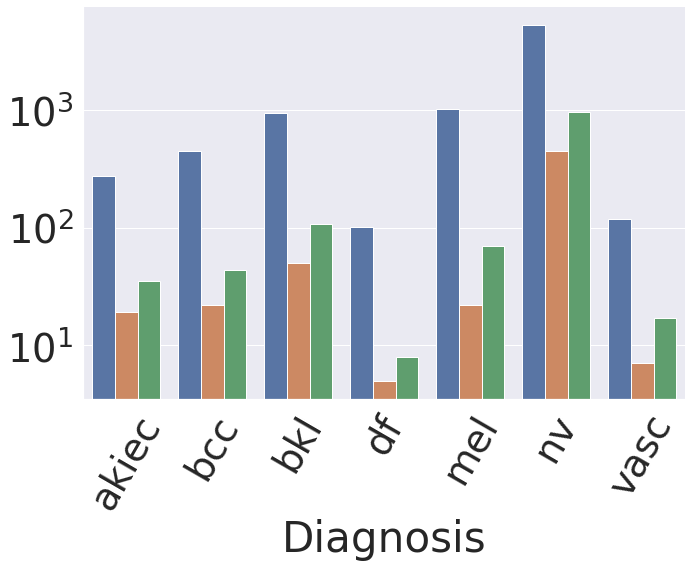

In [30]:
corrected_plot = sns.catplot(
    data=corrected_metadata, kind="count", x="dx", 
    hue="split", order=dx_order, hue_order=hue_order,
    height=8, aspect=12/8
)
plt.yscale("log")
plt.xlabel("Diagnosis")
plt.ylabel("")

plt.xticks(rotation=60)
plt.yticks([10, 100, 1000])
corrected_plot.legend.remove()

plt.savefig(PLOTS_SAVE_DIR / "corrected_statistics.png", dpi=300, bbox_inches="tight")
plt.savefig(PLOTS_SAVE_DIR / "corrected_statistics.pdf", dpi=300, bbox_inches="tight")

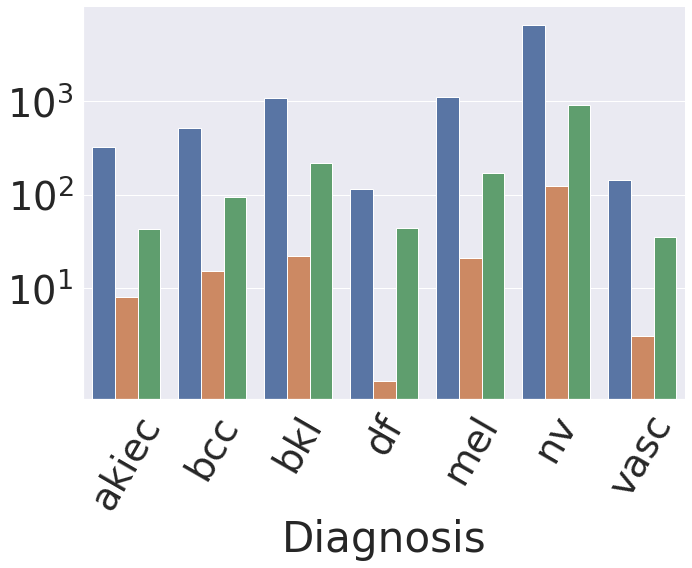

In [28]:
extended_plot = sns.catplot(
    data=extended_metadata, kind="count", x="diag", 
    hue="split", order=dx_order, hue_order=hue_order,
    height=8, aspect=12/8
)
plt.yscale("log")
plt.xlabel("Diagnosis")
plt.ylabel("")

plt.xticks(rotation=60)
plt.yticks([10, 100, 1000])
extended_plot.legend.remove()

plt.savefig(PLOTS_SAVE_DIR / "extended_statistics.png", dpi=300, bbox_inches="tight")
plt.savefig(PLOTS_SAVE_DIR / "extended_statistics.pdf", dpi=300, bbox_inches="tight")

# Visualizing lesions that leak across partitions

In [98]:
lesion_id_freq = original_metadata['lesion_id'].value_counts()

In [99]:
lesion_id_freq[set((lesion_id_freq[lesion_id_freq >= 4]).index.tolist()) & set(int_1_2_3)]

/tmp/ipykernel_261577/3037153019.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  lesion_id_freq[set((lesion_id_freq[lesion_id_freq >= 4]).index.tolist()) & set(int_1_2_3)]


HAM_0005755    4
HAM_0001721    4
HAM_0002042    4
HAM_0007343    5
HAM_0001781    4
HAM_0002008    4
HAM_0003021    4
HAM_0002364    5
Name: lesion_id, dtype: int64

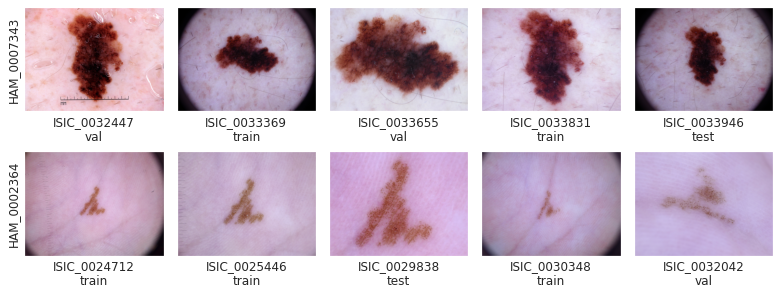

In [183]:
selected_lesionIDs = [
    "HAM_0007343",
    "HAM_0002364",
]

fig, axs = plt.subplots(nrows=len(selected_lesionIDs), ncols=5, figsize=(11, 4.4))

for idx in range(len(selected_lesionIDs)):
    filtered_images_df = original_metadata[original_metadata["lesion_id"] == selected_lesionIDs[idx]]
    filtered_images_df = filtered_images_df.sort_values(by="image_id").reset_index()
    for image_idx, image_row in filtered_images_df.iterrows():
        image = Image.open(HAM10k_DATA_DIR / (f"{image_row['image_id']}.jpg"))
        axs[idx][image_idx].imshow(image)
        axs[idx][image_idx].set_xticks([])
        axs[idx][image_idx].set_xlabel(f"{image_row['image_id']}\n{image_row['split']}")
        axs[idx][image_idx].set_yticks([])
        if image_idx == 0:
            axs[idx][image_idx].set_ylabel(selected_lesionIDs[idx])
        
# [ax.set_axis_off() for ax in axs.ravel()]
fig.tight_layout()

plt.savefig(PLOTS_SAVE_DIR / "leaking_lesions.png", dpi=300, bbox_inches="tight")
plt.savefig(PLOTS_SAVE_DIR / "leaking_lesions.pdf", dpi=300, bbox_inches="tight")

# Visualizing the impact of original -> 28 -> 224 resizing

In [137]:
selected_imageIDs = [
    "ISIC_0034074",
    "ISIC_0027977",
    "ISIC_0029814",
    "ISIC_0032004",
    "ISIC_0030970",
    "ISIC_0026622",
]

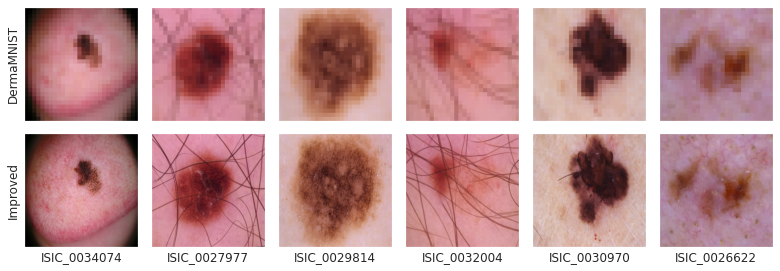

In [182]:
fig, axs = plt.subplots(nrows=2, ncols=len(selected_imageIDs), figsize=(11, 4))

for idx in range(len(selected_imageIDs)):
    original_image = Image.open(HAM10k_DATA_DIR / (f"{selected_imageIDs[idx]}.jpg"))
    bad_resize = original_image.resize((28, 28), resample=Image.BICUBIC).resize((224, 224), resample=Image.NEAREST)
    good_resize = original_image.resize((224, 224), resample=Image.BICUBIC)

    axs[0][idx].imshow(bad_resize)
    axs[0][idx].set_xticks([])
    axs[0][idx].set_yticks([])
    axs[1][idx].imshow(good_resize)
    axs[1][idx].set_xticks([])
    axs[1][idx].set_yticks([])
    axs[1][idx].set_xlabel(selected_imageIDs[idx])
    
    if idx == 0:
        axs[0][0].set_ylabel("DermaMNIST")
        axs[1][0].set_ylabel("Improved")

# [ax.set_axis_off() for ax in axs.ravel()]
fig.tight_layout()

plt.savefig(PLOTS_SAVE_DIR / "resizing_loss_vis.png", dpi=300, bbox_inches="tight")
plt.savefig(PLOTS_SAVE_DIR / "resizing_loss_vis.pdf", dpi=300, bbox_inches="tight")